# US Baby Names 1880-2010

#### Extracted (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

The baby names datasets are contained in the acompanying folder(or [download here](http://www.ssa.gov/oact/babynames/limits.html)) they contain a list of the most frequent names given to newborn babies in the United States each year.
There are many things you might want to do with the dataset:

* Visualize the proportion of babies given a particular name (your own, or another name) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increases or decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters.
* Analyze external sources of trends: biblical names, celebrities, demographic changes.

In this exercise you are tasked with completing the analysis. I have started some of the steps for you and I have given some tips on waht methos to use.


## Code

As with most analysis we will need to import some libraries. For this analyis we want to reading the data, perform analysis and visualise the data. therefore the Pandas and matplotlib libraries are needed.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

First open a single file 1880 set the field headings to'name', 'sex', 'births' (hint use the pandas read_csv method)

In [ ]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

Now display the top 5 rows

In [ ]:
names1880[:5]

Often datasets span more than one file. In this example each year is in a seperate file we need to combines all of this year data into a single pandas DataFrame and add a *year* field. Note that all .txt files must be stored as *./names*.

This is a little challenging so I have completed this task below, make sure you understand how the code below operates.

In [ ]:
years = range(1880, 2013)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)


Now display the first 5 records from the combined dataframe

In [5]:
names[:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:

set_option('display.width', 100)
set_option('precision', 3)
description = names.describe()
print(description)

We can now perform several types of aggregation. 

Create a new DataFrame containing the total number of births per year, split by sex. 

(Hint use the pivot_table method with the aggragate function sum property)

In [6]:
total_births = names.pivot_table('births', 'year', 'sex', aggfunc=sum)

In [7]:
total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442


Using the *plot* function draw a figure to illustrate this DataFrame. 

Plot the genders in 2 line graphs with year on the X axis and the number of births on the Y axis, Don't forget a title and axis labels.

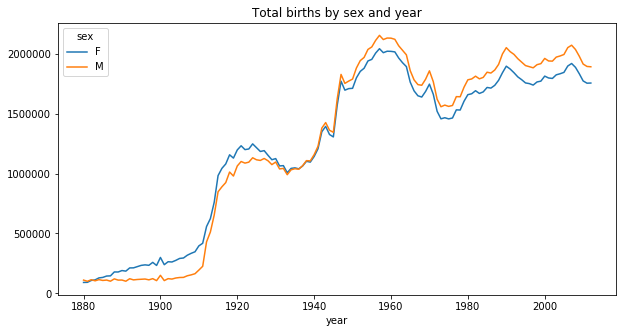

In [8]:
total_births.plot(figsize=(10,5),title='Total births by sex and year')

Now we would like to analyse how frequently the names *John*, *Michael*, *Mary*, *Mark*,*Jeremy* and *Amelia* occurr over time.

Redefine *total_births*, this time aggregating data by *name* rather than *sex*.

Then define the subset of names that we are interested

Finally plot each name in its own graph.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cd918ecc0>,
      dtype=object)

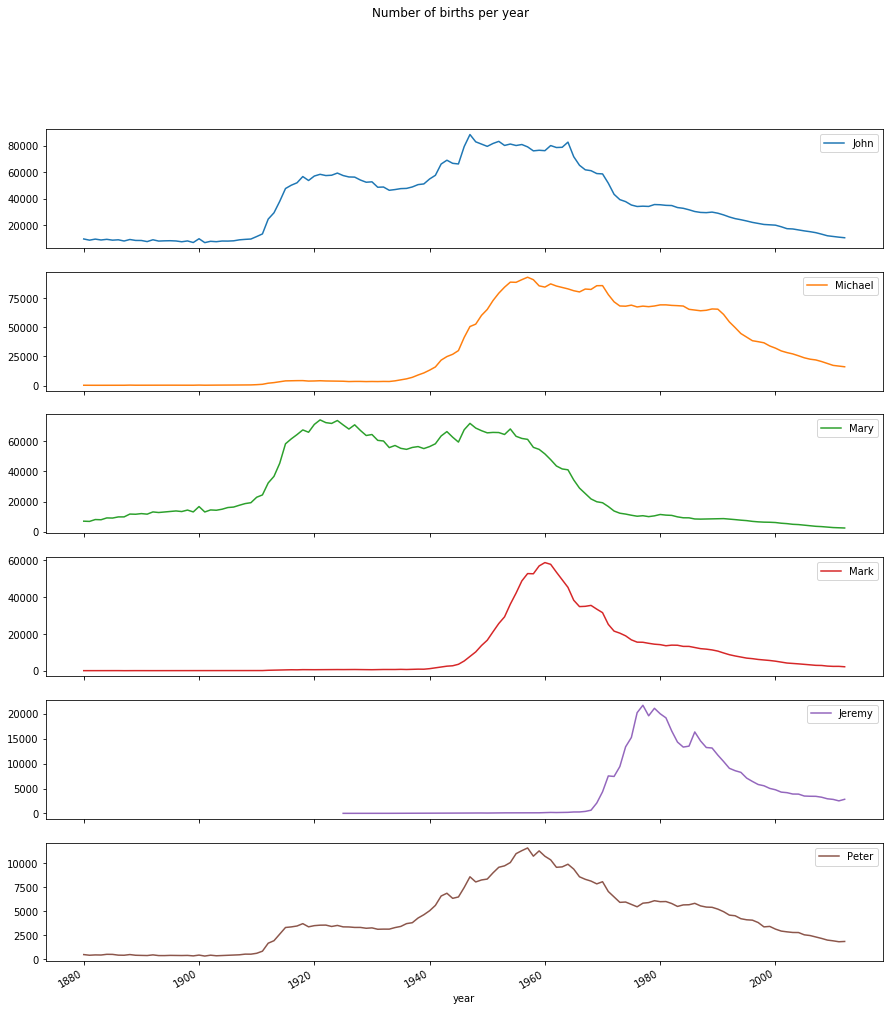

In [9]:
total_births = names.pivot_table('births', 'year', 'name', aggfunc=sum)
subset = total_births[['John', 'Michael', 'Mary', 'Mark','Jeremy','Amelia']]
subset.plot(subplots=True, figsize=(15, 17), grid=False,title="Number of births per year")

Next we need to look at how the distribution of boy names by final letter has changed over the last 100 years. 

To see this, first aggregate all of the births in the full dataset by year, sex, and final letter.

(This is a bit tricky so I have done some of the difficult bits)

In [10]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births',last_letters,['sex', 'year'], aggfunc=sum)


Then we select a few representative years 1912, 1962, 2012, spanning 100 years in total, display the first 5 records in a table:

(Hint: use the reindex method https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html)

In [11]:
subtable = table.reindex(columns=[1912, 1962, 2012], level='year')
subtable.head()

sex                 F                            M                    
year             1912      1962      2012     1912      1962      2012
last_letter                                                           
a            149178.0  682541.0  654517.0   1655.0    5331.0   27201.0
b                 NaN     459.0     471.0    923.0    3458.0   34706.0
c                 NaN      73.0    1235.0   1053.0   17881.0   24268.0
d             10523.0    3673.0    2530.0  54090.0  249996.0   42457.0
e            180522.0  424745.0  320528.0  54716.0  164952.0  128430.0

Now, we should normalize the table by the number of births, so as to obtain the proportion of total births for each sex ending in each letter: 

There are functions in python for normalisation but here we will just simply divide each value by the aggragated sum for that table. i.e. divide each subtable by the total 

In [12]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop.head()

sex                 F                             M                    
year             1912      1962      2012      1912      1962      2012
last_letter                                                            
a            0.267288  0.347073  0.372450  0.003849  0.002577  0.014368
b                 NaN  0.000233  0.000268  0.002147  0.001672  0.018333
c                 NaN  0.000037  0.000703  0.002449  0.008644  0.012819
d            0.018854  0.001868  0.001440  0.125806  0.120849  0.022427
e            0.323448  0.215983  0.182395  0.127262  0.079738  0.067840

Finally make <b>bar plots</b> for each sex broken-down by year


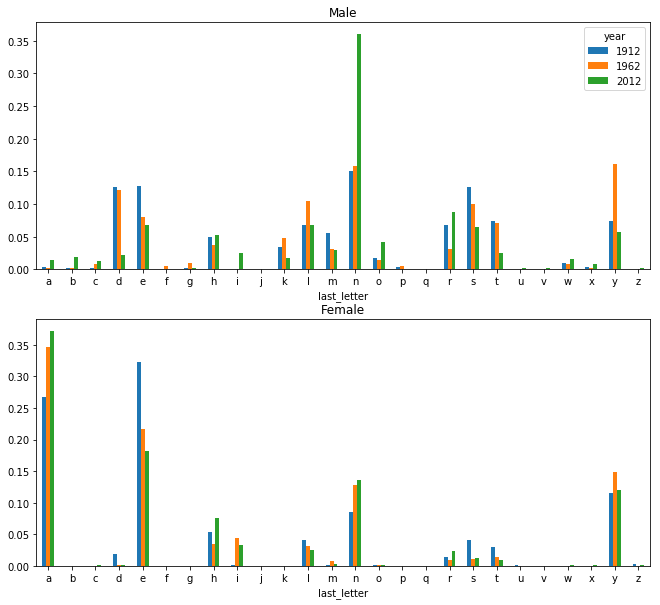

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)
